In [565]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


There are five 4D vectors:

[1, 3, 5, 7], [-1, 2, -3, 0], [0, 1, 1,-1], [0, 2, 1, 1], [-2, 4, -5, 4]

Find a 2D plane, so all these vectors almost belong to it. Use SVD to find it.


In [566]:
A = np.array([
    [1, 3, 5, 7], [-1, 2, -3, 0], [0, 1, 1, -1], [0, 2, 1, 1], [-2, 4, -5, 4]
])
A


array([[ 1,  3,  5,  7],
       [-1,  2, -3,  0],
       [ 0,  1,  1, -1],
       [ 0,  2,  1,  1],
       [-2,  4, -5,  4]])

In [567]:
center = np.mean(A, axis=0)
Ac = A - center
center, Ac

(array([-0.4,  2.4, -0.2,  2.2]),
 array([[ 1.4,  0.6,  5.2,  4.8],
        [-0.6, -0.4, -2.8, -2.2],
        [ 0.4, -1.4,  1.2, -3.2],
        [ 0.4, -0.4,  1.2, -1.2],
        [-1.6,  1.6, -4.8,  1.8]]))

In [568]:
U, S, V = np.linalg.svd(Ac)


In [569]:
U.round()


array([[-1.,  0., -0.,  0.,  0.],
       [ 0., -0., -1.,  0.,  0.],
       [ 0., -1., -0., -1.,  0.],
       [-0., -0.,  1.,  0.,  0.],
       [ 0.,  1.,  0., -0.,  0.]])

In [570]:
S


array([8.67754781, 6.21118462, 0.30880082, 0.16121905])

In [571]:
V


array([[-0.23581841, -0.00340404, -0.84798065, -0.47466506],
       [-0.15954435,  0.36448918, -0.41507454,  0.81817258],
       [-0.31001581,  0.85999248,  0.25783601, -0.31276784],
       [ 0.90709728,  0.35713999, -0.2053352 , -0.08638866]])

In [572]:
b1, b2 = V[:2].round(2)
b1, b2


(array([-0.24, -0.  , -0.85, -0.47]), array([-0.16,  0.36, -0.42,  0.82]))

In [573]:
Anew = A.dot(V.T).round(2)
Anew


array([[-7.81,  4.59,  1.37,  0.35],
       [ 2.77,  2.13,  1.26,  0.42],
       [-0.38, -0.87,  1.43,  0.24],
       [-1.33,  1.13,  1.67,  0.42],
       [ 2.8 ,  7.13,  1.52,  0.3 ]])

In [574]:
# v = v3 + b1 * t1 + b2 * t2
# v = t1 * v1 + t2 * v2 + t3 * v3
# 1 = t1 + t2 + t3 
# v = t1 * center + t2 * b1 + t3 * b2
# scalars = [t1, t2, t3]

A = np.vstack((center, b1, b2))[:3]
b = Anew[:, :3].T
scalars = np.linalg.pinv(A).dot(b)
scalars[:3].T.round(2)


array([[-0.81, -4.43, -5.52],
       [-0.76,  1.01, -2.19],
       [ 0.3 , -2.6 , -0.54],
       [-0.21, -2.54, -2.33],
       [-2.2 ,  3.09, -6.08]])

(1.4, -0.6, 0.4, 0.4, -1.6) (0.6000000000000001, -0.3999999999999999, -1.4, -0.3999999999999999, 1.6)


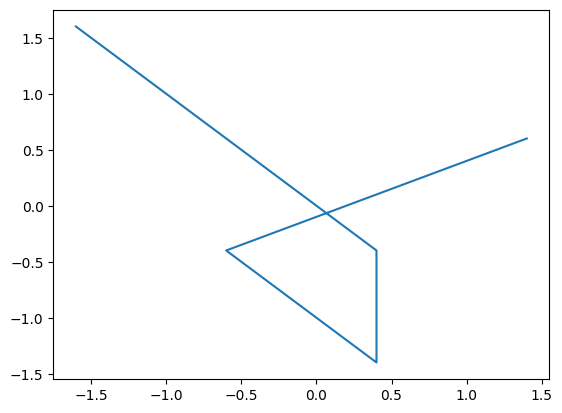

In [575]:
x, y ,z,w = zip(*Ac)
print(x, y)
plt.plot(x, y)
plt.show()
